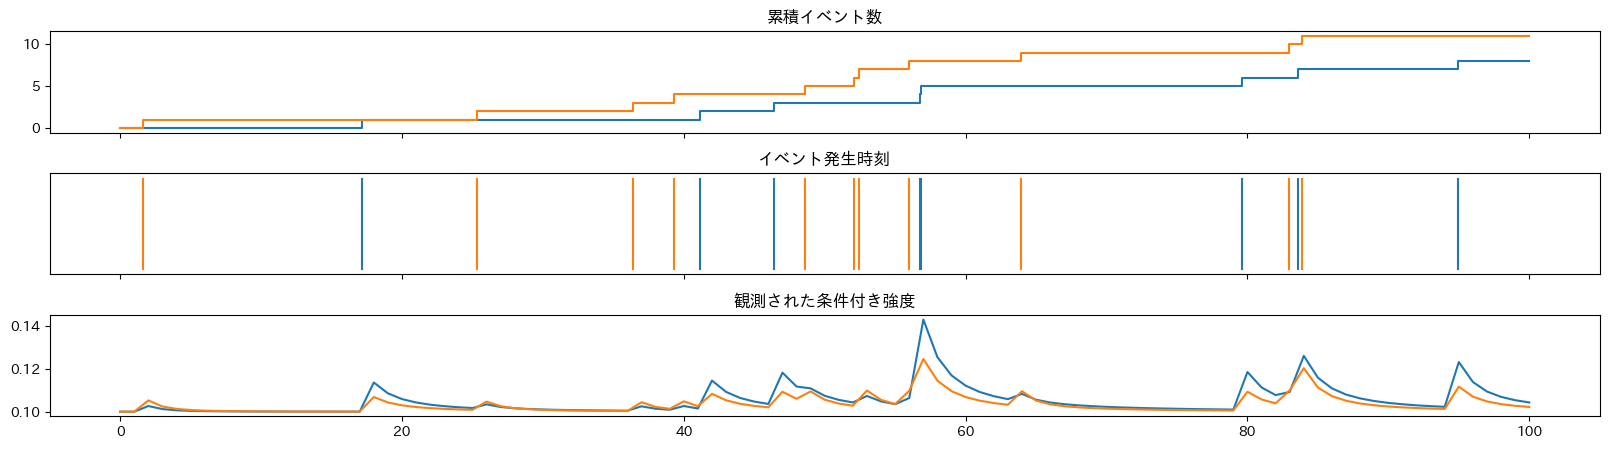

In [2]:
from hawkes import (
    ExpKernelModel,
    PowLawKernelModel,
    GradientOptimizerSettings,
    RandomSearchOptimizerSettings
)

# T = 100
# mu = 0.1
# a = 0.2
# b = 0.5

# exp_model = ExpKernelModel()
# events = exp_model.simulate(mu, a, b, T)
# events.plot()
import numpy as np

T = 100
mu = np.array([0.1, 0.1])

K = np.array([[0.2, 0.1], [0.1, 0.2]])
p = np.array([[2, 3], [2, 3]])
c = np.array([[3, 3], [3, 3]])

pow_law_model = PowLawKernelModel()
result = pow_law_model.simulate(mu, K, p, c, T)
result.plot()